#  Pendahuluan

Di dalam material ini, kamu akan mempelajari TensorFlow dan belajar bagaimana ia dapat digunakan untuk menyelesaikan tugas deep learning. Lakukan kode dan jalankan setiap sel. Selama proses pembelajaran, kamu akan menemui beberapa blok **TODO** -- ikuti petunjuk untuk mengisinya sebelum menjalankan sel-sel tersebut dan melanjutkan.

## Install TensorFlow

Disini kamu akan melakukan instalasi TensorFlow terlebih dahulu. TensorFlow adalah library yang banyak digunakan dalam machine learning. Di sini, kita akan belajar bagaimana komputasi direpresentasikan dan bagaimana mendefinisikan neural networks menggunakan TensorFlow.

In [4]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

TensorFlow disebut 'TensorFlow' karena mengelola aliran berupa node/operasi matematika dari Tensor (sebuah struktur data yang dapat dibentuk sebagai array multidimensi, layaknya numpy). Tensor direpresentasikan sebagai array n-dimensi dari tipe data dasar seperti string atau bilangan bulat -- ini menyediakan cara untuk menggeneralisasi vektor dan matriks ke dimensi yang lebih tinggi (atau rank atau jumlah dimensi).

Bentuk (shape) dari sebuah Tensor menentukan jumlah dimensi dan ukuran setiap dimensinya. Rank dari Tensor menyediakan jumlah dimensi (n-dimensor.

Mari pertama-tama lihat Tensor 0-dimensi (0-d Tensorperhatikan berikut ini.

In [ ]:
huruf = tf.constant("Aku", tf.string)
numerik = tf.constant(3.14213123, tf.float64)

print("`huruf` is a {}-d Tensor".format(tf.rank(huruf).numpy()))
print("`numerik` is a {}-d Tensor".format(tf.rank(numerik).numpy()))

Dari kodingan diatas, kita dapat mengubah Tensor menjadi 1-dimensi.

In [ ]:
huruf = tf.constant(["Aku", "Saya"], tf.string)
numerik = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`huruf` is a {}-d Tensor with shape: {}".format(tf.rank(huruf).numpy(), tf.shape(huruf)))
print("`numerik` is a {}-d Tensor with shape: {}".format(tf.rank(numerik).numpy(), tf.shape(numerik)))

Selanjutnya, kita akan mempertimbangkan pembuatan Tensor dengan rank yang lebih tinggi. Misalnya, kita akan membuat Tensor 4-dimensi. Silahkan isi berikut ini (Jika kamu berhasil, ketika di run tidak muncul error).

In [ ]:
'''TODO: Definisikan 2-d Tensor'''
matrix = # TODO

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [ ]:
'''TODO: Definisikan 4-d Tensor.'''
# Gunakan tf.zeros untuk menginisialisasi Tensor 4-dimensi berisi nol dengan ukuran 10 x 256 x 256 x 3.
# Kamu dapat menganggapnya sebagai 10 gambar di mana setiap gambar memiliki ukuran RGB 256 x 256.
images = # TODO

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

Seperti yang telah kita ketahui, bentuk (shape) dari sebuah Tensor memberikan jumlah elemen dalam setiap dimensi Tensor. Bentuk (shape) ini sangat berguna, dan kita akan sering menggunakannya. 

In [ ]:
row_vector = matrix[1]
column_vector = matrix[:,1]
scalar = matrix[0, 1]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

## Komputasi dengan TensorFlow

Cara yang nyaman untuk memahami dan memvisualisasikan perhitungan di TensorFlow adalah dengan menggunakan gambar flow. Kita dapat mendefinisikan **flow dibawah ini** dalam bentuk Tensor, yang menyimpan data, dan operasi matematika yang berlaku pada Tensor ini dalam urutan tertentu.

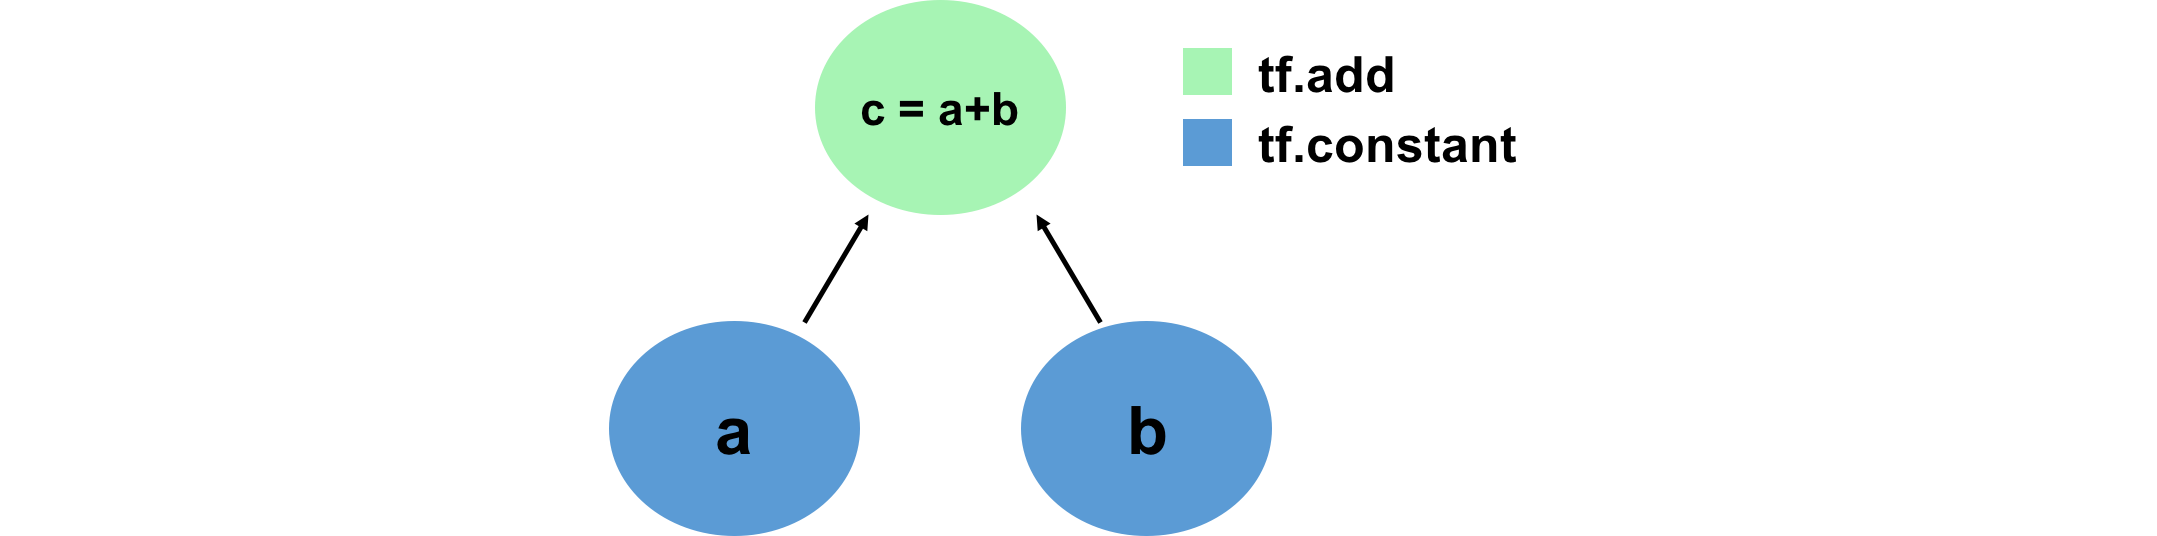

In [ ]:
# inisiasi node A dan B dengan value constant
a = tf.constant(15)
b = tf.constant(61)

# Jumlahkan keduanya
c1 = tf.add(a,b)
c2 = a + b # TensorFlow pun bisa menggunakan "+" operation
print(c1)
print(c2)

Perhatikan bagaimana kamu telah membuat grafik komputasi yang terdiri dari operasi-operasi TensorFlow, dan bagaimana hasilnya adalah Tensor dengan nilai 76. Sekarang, **mari pertimbangkan contoh yang sedikit lebih seru.**

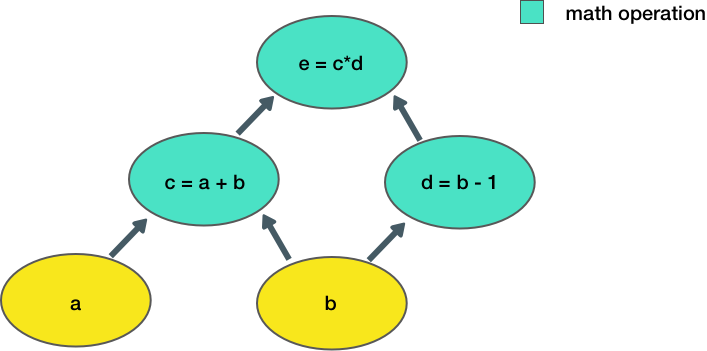

Di sini, kita mengambil dua input, yaitu a dan b, lalu menghitung output e. Setiap node dalam grafik mewakili operasi yang mengambil beberapa input, melakukan beberapa perhitungan, dan meneruskan hasil keluarannya ke node lain.

Mari kita mendefinisikan fungsi sederhana dalam TensorFlow untuk membangun fungsi perhitungan ini:

In [ ]:
### Definisi Perhitungan Tensor ###

# Membangun fungsi perhitungan sederhana
def func(a,b):
  '''TODO: Tentukan operasi untuk c, d, e (gunakan tf.add, tf.subtract, tf.multiply).'''
  c = # TODO
  d = # TODO
  e = # TODO
  return e

Mari kita panggil func yang sudah dibuat dan melakukan inputan a, b.

In [ ]:
# Penentuan value a dan b
a, b = 1.5, 2.5
# Menghitung komputasi
e_out = func(a,b)
print(e_out)

Perhatikan bagaimana hasil yang didapatkan tidak memiliki bentuk (shape) karena merupakan nilai skalar tunggal (0-d).

## Membuat Neural Networks

Kita juga dapat mendefinisikan neural networks dalam TensorFlow dimana terdapat Keras yang menyediakan kerangka yang kuat dan intuitif untuk membangun dan melatih model deep learning. Mari pertama-tama pertimbangkan contoh dari sebuah perceptron sederhana yang didefinisikan hanya dengan satu lapisan dengan formula:

$(y=\delta(Wx+b))$

Di mana **W** sebagai weight (matriks bobot), **b** adalah bias, **x** adalah input, **$\delta$** adalah fungsi aktivasi sigmoid, dan **y** adalah keluaran. Kita juga dapat memvisualisasikan operasi ini menggunakan gambar berikut ini.

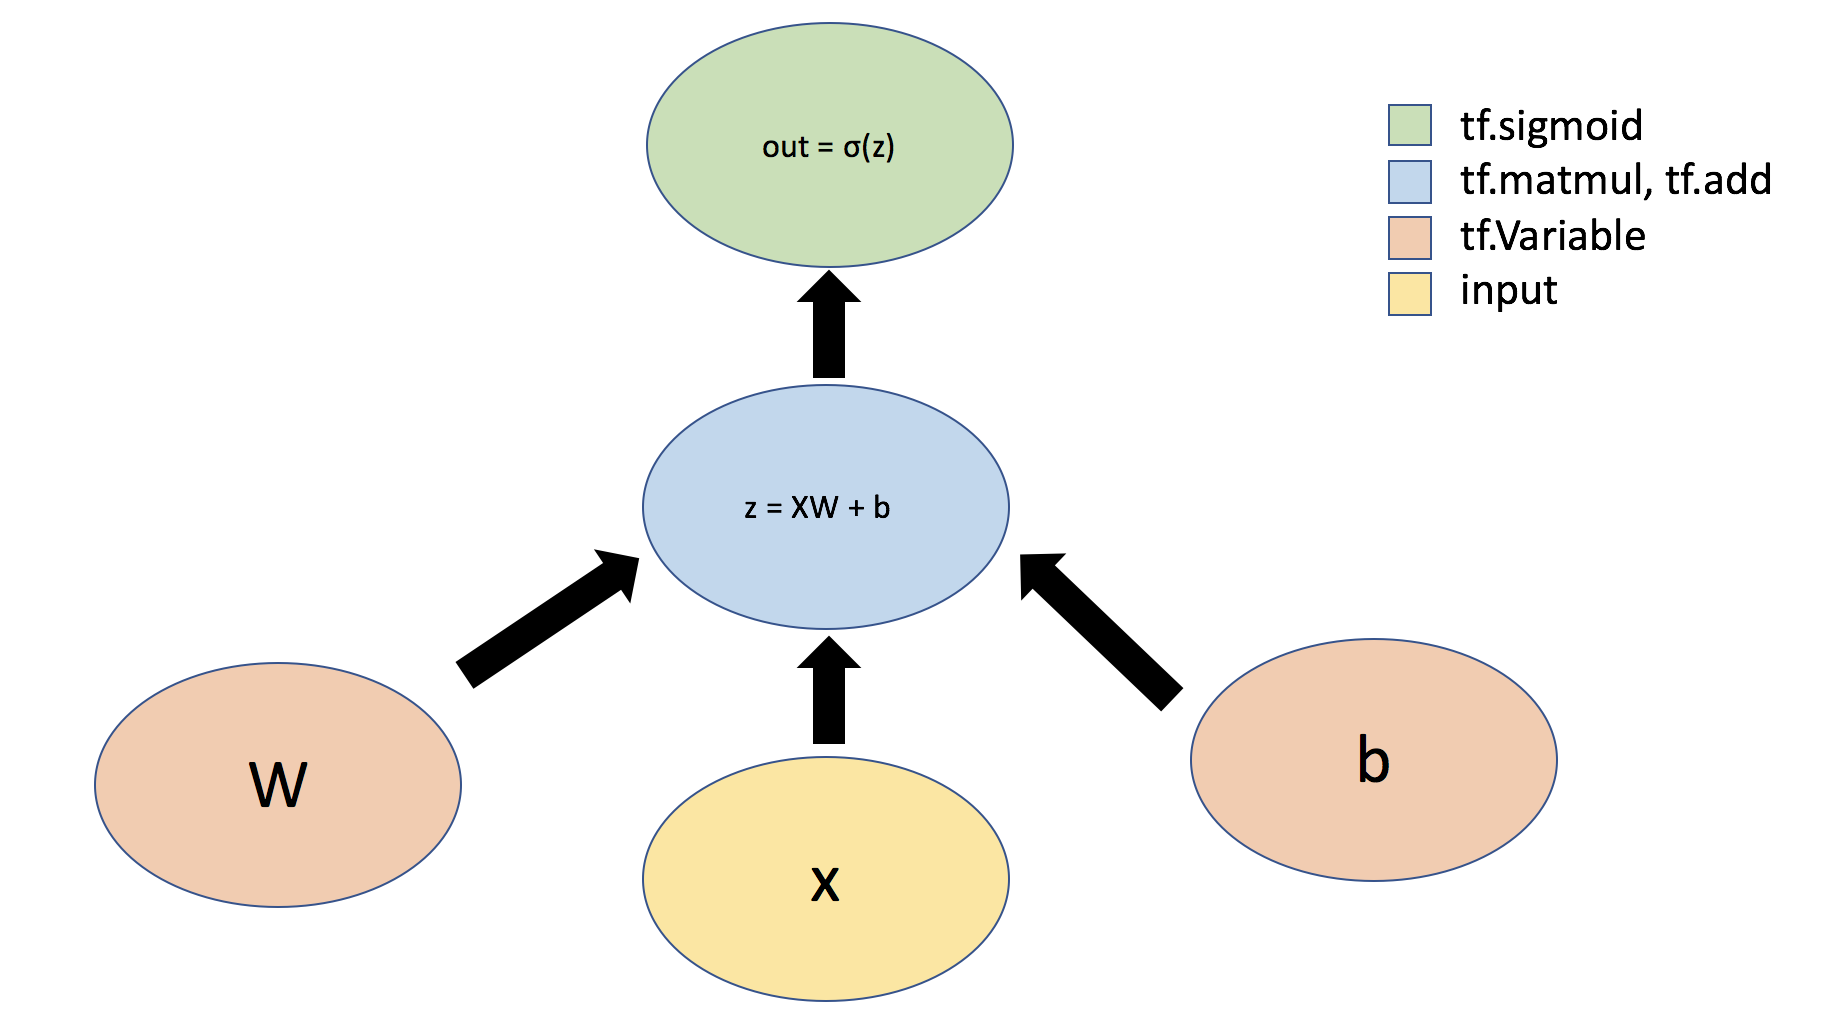

Tensor dapat mengalir melalui blok Neural Network yang disebut Layer. Layer berisikan operasi umum matematis untuk memperbarui bobot, menghitung loss, dan mendefinisikan konektivitas antar-layer. Kita akan pertama-tama mendefinisikan sebuah Layer untuk mengimplementasikan perceptron sederhana diatas.

In [ ]:
# n_output_nodes: jumlah node keluaran
# input_shape: bentuk (shape) dari input
# x: input ke layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Definisikan dan inisialisasi parameter: matriks bobot W dan bias b
    # Perlu diingat bahwa inisialisasi parameter bersifat acak!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # perhatikan dimensinya
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # perhatikan dimensinya

  def call(self, x):
    '''TODO: tentukan operasi untuk z (petunjuk: gunakan tf.matmul)'''
    z = # TODO

    '''TODO: tentukan operasi untuk out (petunjuk: gunakan tf.sigmoid)'''
    y = # TODO
    return y

# Karena parameter layer diinisialisasi secara acak, kita akan mengatur seed acak untuk memastikan reproduktibilitas
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# uji keluarannya!
print(y.numpy())


Secara praktis, TensorFlow telahmenyediakan tools untuk membangun Dense (Layer) dengan  menggunakan model Sequential dari Keraa. Dengan menggunakan Sequential,Kitaa dapat dengan mudah membuatNeural Networksf dengan menggabungkan bersama-sama layer seperti membangun blok-blok.

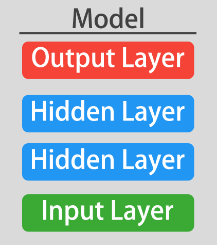

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Tentukan jumlah output node
n_output_nodes = 3

# Pertama-tama, definisikan model
model = Sequential()

'''TODO: Tentukan dense (fully connected) layer untuk menghitung z'''
# Ingat: layer dense didefinisikan oleh parameter-parameter W dan b!
# Anda dapat membaca lebih lanjut tentang inisialisasi W dan b di dokumentasi TF :)
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = # TO DO
# Tambahkan dense layer ke dalam model
model.add(dense_layer)

Selanjutnya kita uji model yang kita buat.

In [ ]:
# Uji model dengan input contoh
x_input = tf.constant([[1, 2.]], shape=(1, 2))

'''TODO: berikan input ke dalam model dan prediksi keluarannya!'''
model_output = # TO DO
print(model_output)

Kita akan coba kembangkan pembelajaran yang kita pelajari sebelumnya untuk membuat Neural Networks dari gambar dibawah ini dengan ketentuan:

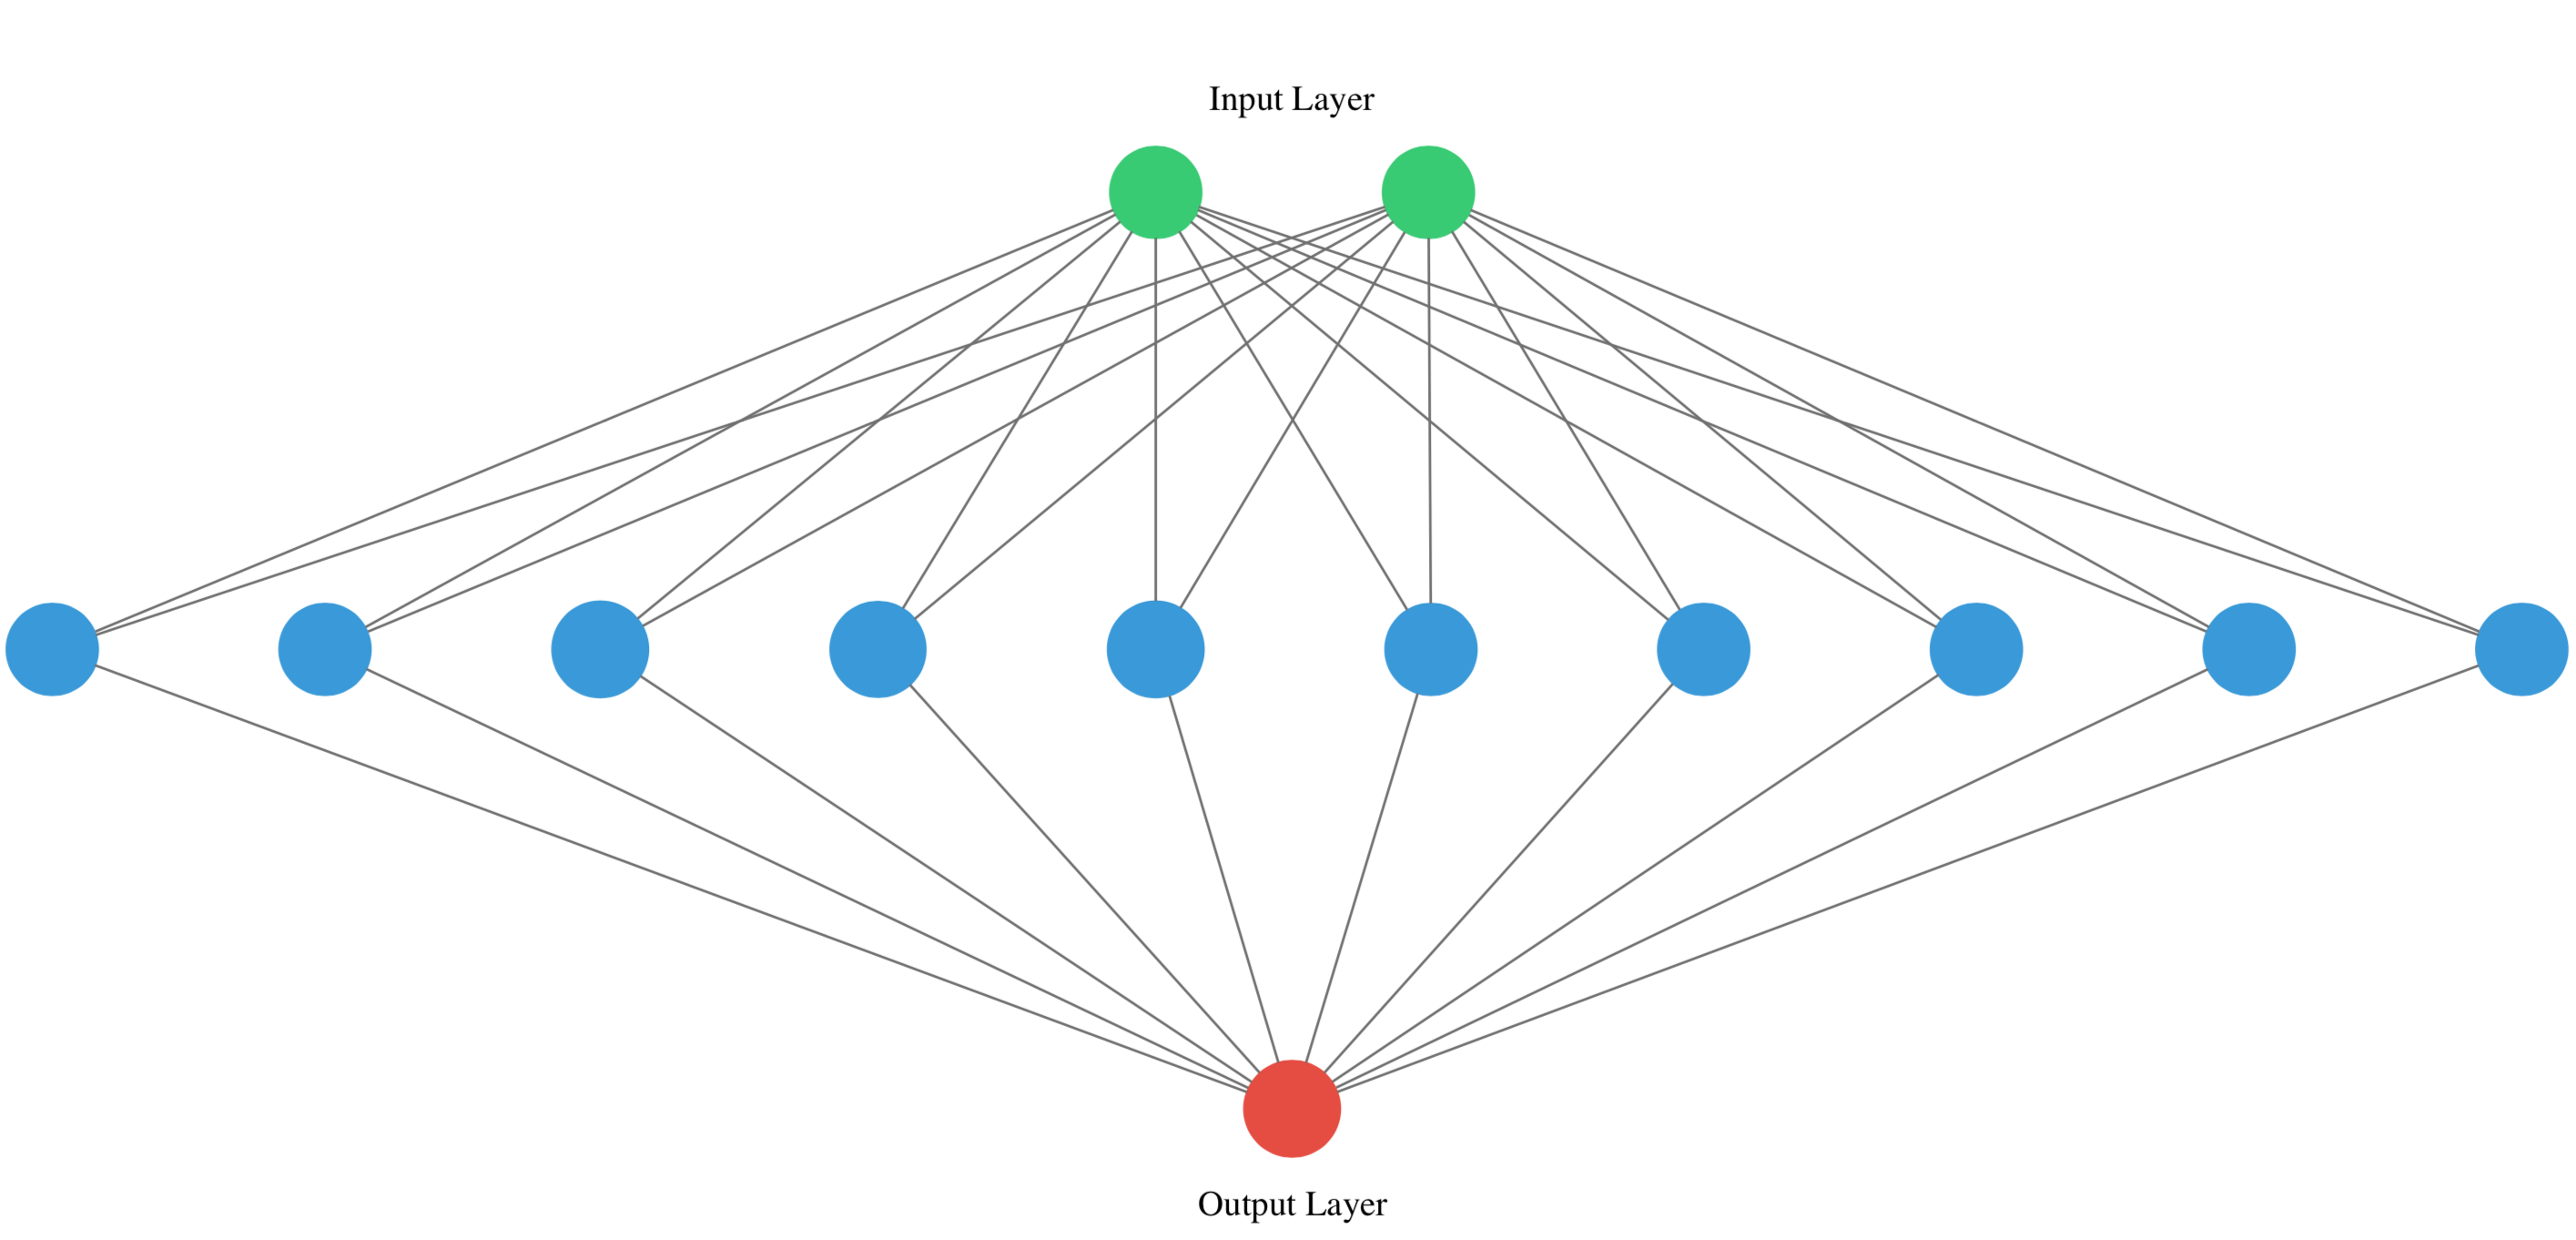

In [ ]:
'''TODO: Create Neural Networks'''
from tensorflow.keras.# TODO import Sequential
from tensorflow.keras.# TODO import Dense

# Menyiapkan sequantial model
model = # TODO

# Menambahkan input layer dengan hidden layer (10)
model.add(Dense(# TODO, input_shape= # TODO activation="relu"))

# Tambahkan satu inputan 1-neuron output layer
model.add(# TODO)

# Simpulkan model
model.# TODO

Silahkan kembangkan kemampuanmu untuk menjawab berikut ini.

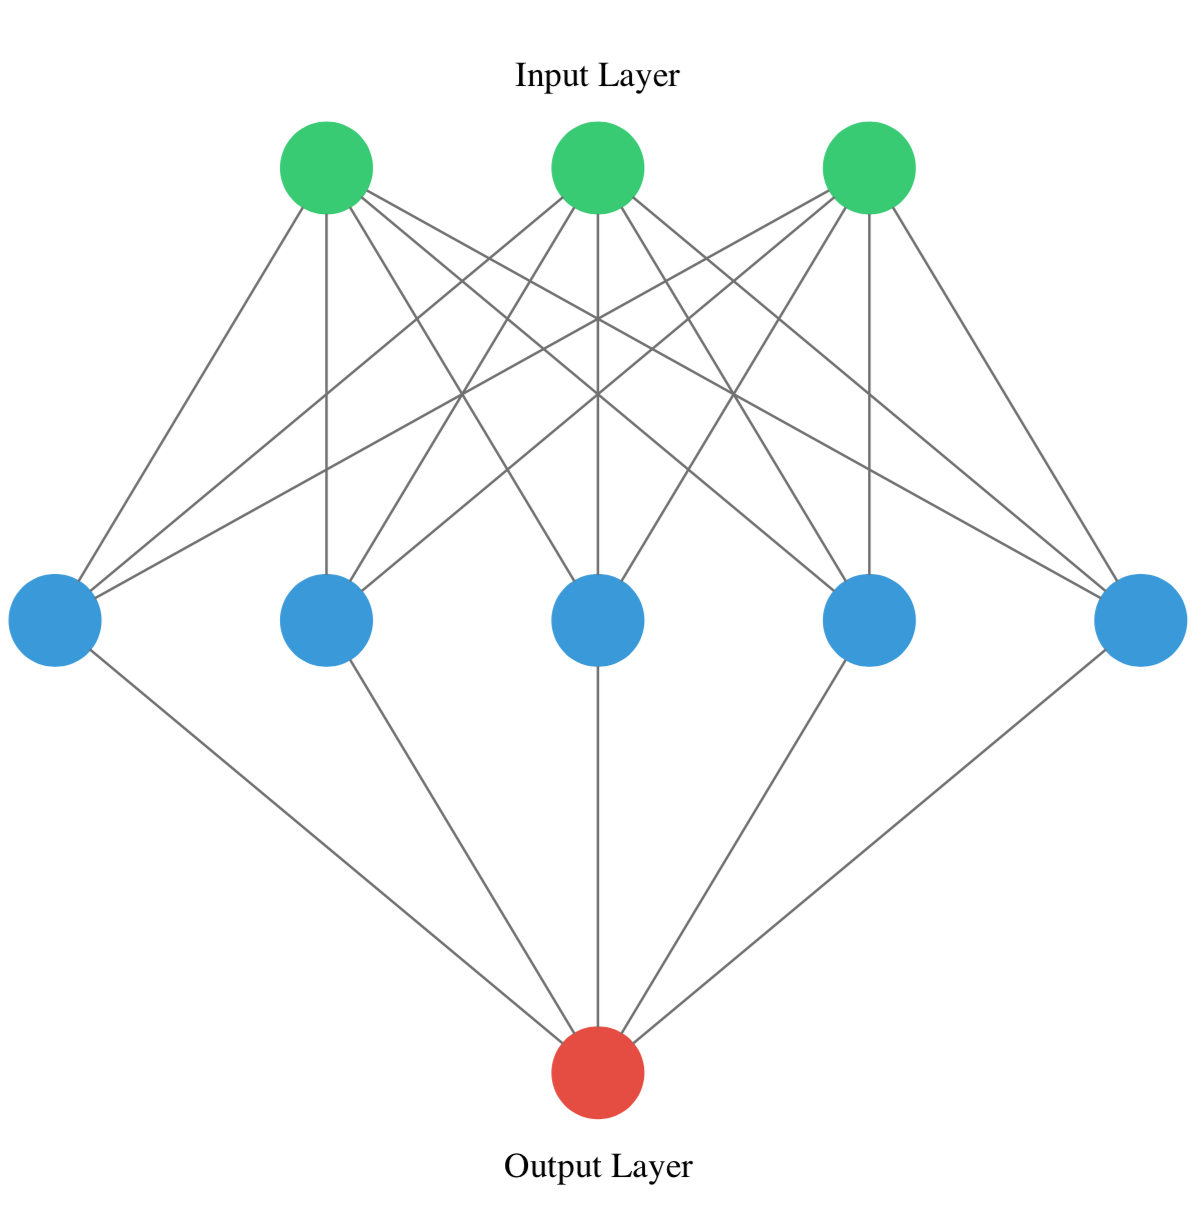

In [ ]:
'''TODO: Memahami Neural Networks'''
# Menginisialisasi model Sequential baru
model = #TODO

# Menambahkan layer Dense pertama dengan 5 neuron dan 3 input
model.add(Dense(#TODO, input_shape=(#TODO), activation="relu"))

# Menambahkan output layer dengan 1 neuron dan tanpa fungsi aktivasi
model.add(#TODO)

# Menampilkan ringkasan model
model.#TODO

Apa simpulan yang kamu dapatkan? Terdapat 20 parameter dimana 15 parameter inputan ke hidden layer dan 5 weight di hidden layer.

Selanjutnya, selesaikan berikut ini.

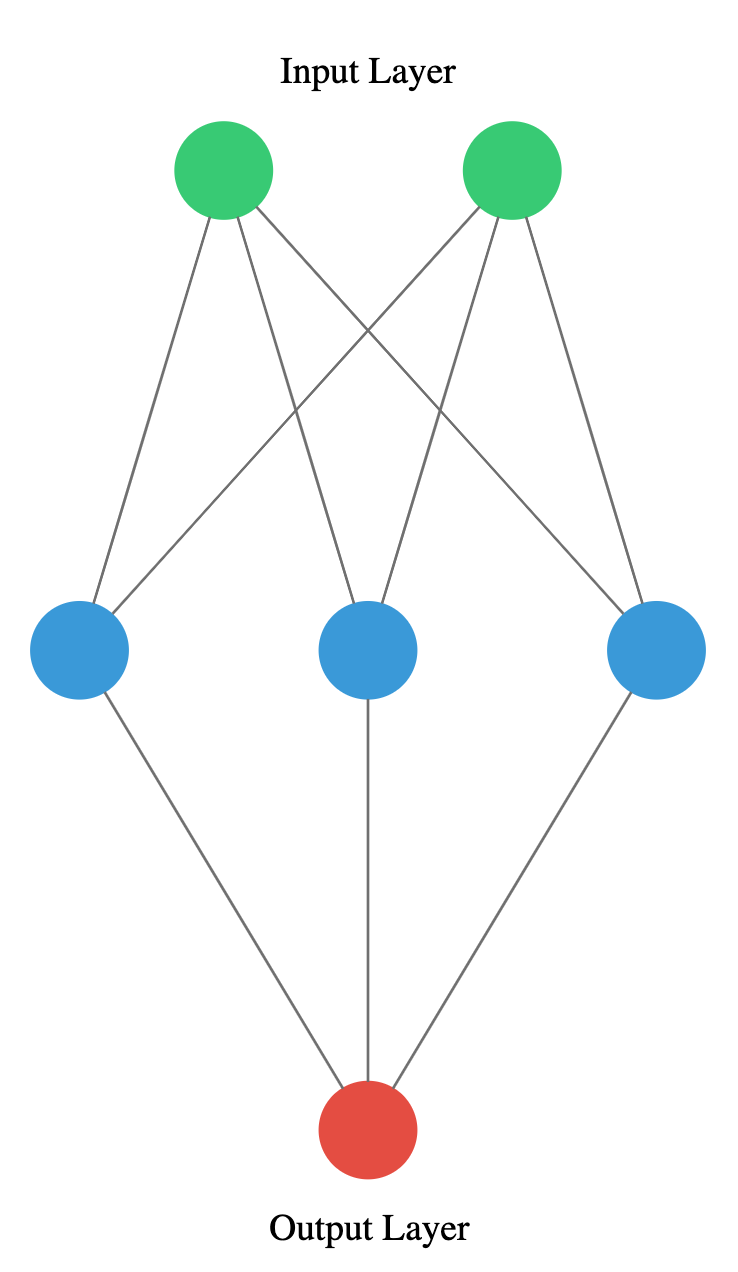

In [ ]:
'''TODO: Memahami Neural Networks 2'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Menginisialisasi model Sequential baru
model = #TODO

# Menambahkan layer Dense 
model.#TODO

# Menambahkan layer Dense output
model.#TODO

## Implementasi Data Iris

Disini kita akan mencoba membedah data iris. Dataset Iris adalah dataset populer dalam machine learning yang berisi informasi mengenai tiga spesies iris (Iris setosa, Iris versicolor, dan Iris virginica) dengan empat fitur numerik (panjang dan lebar sepal, serta panjang dan lebar petal).Perhatikan bahwa terdapat beberapa langkah yang akan kita pelajari diantaranya:

1. Memuat dataset Iris
2. Pra-pemrosesan data
3. Membangun Model Neural Network
4. Melatih Model dengan Data Training
5. Evaluasi Model dengan Data Testing

**Langkah 1: Memuat dataset Iris**

Pertama, kita akan memuat dataset Iris dari scikit-learn menggunakan modul load_iris. Dataset ini akan berisi fitur-fitur (X) dan label kelas (y) yang akan digunakan dalam pelatihan dan evaluasi model. Silahkan pisahkan data X yang berisikan **iris.data** dan y yang berisikan **iris.target**.

In [ ]:
from sklearn.datasets import load_iris

# Memuat dataset Iris
iris = load_iris()
# Menambahkan iris dataset
X = #TODO
y = #TODO

**Langkah 2: Pra-pemrosesan data**

Selanjutnya, kita akan melakukan pra-pemrosesan data dengan menggunakan StandardScaler dari scikit-learn untuk menormalkan skala fitur dalam Iris. Silahkan melakukan scaling data X dengan standar scaler dan spliting data training dengan data testing (Test Size:Training Test 20:80 - random state: 42).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pra-pemrosesan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(#TODO)

# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(# TODO, test_size=0.2, random_state=42)

**Langkah 3: Membangun Model Neural Network**

Sekarang, kita akan membangun model Neural Network menggunakan Keras. Model yang akan kita buat terdiri dari dua layer Dense (fully connected). Layer pertama memiliki 10 neuron dengan fungsi aktivasi 'relu', dan layer kedua memiliki 3 neuron dengan fungsi aktivasi 'softmax' (karena kita memiliki 3 kelas pada dataset Iris).

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Membangun model Neural Network
model = Sequential()
model.add(Dense(#TODO))
model.add(Dense(#TODO))

**Langkah 4: Kompilasi Model**

Setelah kita membangun model, langkah selanjutnya adalah mengkompilasi model kita. Pada langkah ini, kita harus menentukan loss function yang akan digunakan untuk mengukur seberapa baik model kita dalam melakukan klasifikasi. Dalam kasus ini, karena kita memiliki masalah klasifikasi multi-class, kita akan menggunakan loss function 'sparse_categorical_crossentropy'.

In [ ]:
# Kompilasi model
model.compile(#TODO, 
              optimizer='adam', metrics=['accuracy'])

**Langkah 5: Pelatihan Model**

Selanjutnya, kita akan melatih model kita dengan menggunakan data training yang telah kita siapkan sebelumnya. Kita akan melatih model selama 100 epoch dengan ukuran batch sebesar 10, dan mengabaikan verbose (verbose=0) agar hasil pelatihan tidak ditampilkan secara detail di layar.

In [ ]:
# Melatih model dengan data training
model.fit(X_train, y_train, #TODO)

**Langkah 6: Evaluasi Model**

Setelah pelatihan selesai, kita akan melakukan evaluasi model dengan menggunakan data testing yang telah kita pisahkan sebelumnya. Evaluasi model ini akan memberikan kita informasi tentang seberapa baik model kita dalam melakukan klasifikasi pada data yang belum pernah dilihat sebelumnya.

In [ ]:
# Evaluasi model dengan data testing
loss, accuracy = model.evaluate(X_test, y_test)
# Menampilkan hasil evaluasi
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Copyright © DQlab Academy x Abel Kristanto